# Today's Date - 21 June 2023
# Topic - Batch normalization

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [16]:
df = pd.read_csv('/content/concertriccir2.csv', names=['X','Y','class'])

In [17]:
df.head()

,X,Y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


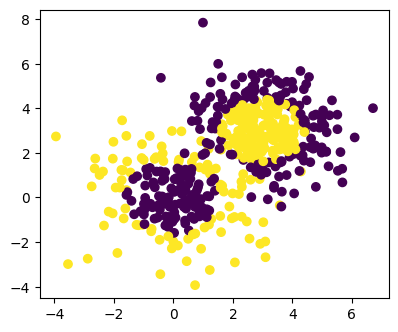

In [18]:
plt.figure(figsize=(4.5,3.75))
plt.scatter(x=df['X'], y=df['Y'],c=df['class'])

In [19]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

# Without batch normalization

In [20]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = model.fit(X,y,epochs=200,validation_split=0.2, verbose=0)

# With Batch normalization

In [22]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization (BatchN  (None, 3)                12        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 40
Trainable params: 30
Non-trainable pa

Here, every neurons stores 4 parameters
Mean, standard deviation (non trainable parameters)
γ, β (trainable parameters)
So total 5 neurons will have 10 non trainable parameters


In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model.fit(X,y,epochs=200,validation_split=0.2, verbose=0)

# Check the validation accuracy of both the models

Text(0.5, 1.0, 'accuracy with and without batch normalization')

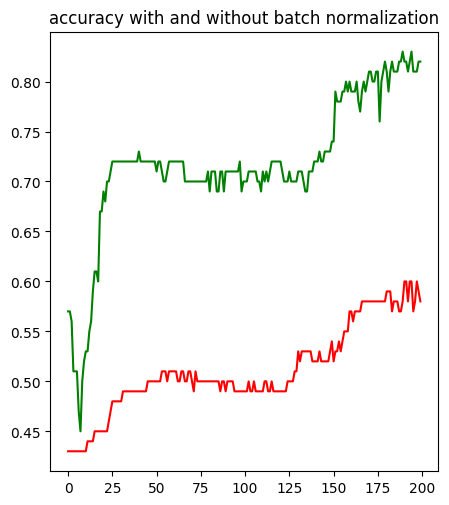

In [26]:
plt.figure(figsize=(5,5.71))
plt.plot(history1.history['val_accuracy'],color='red')
plt.plot(history2.history['val_accuracy'],color='green')
plt.title("accuracy with and without batch normalization")

## From the graph we can cleary see the green line (batch norm) reached much higher accuracy at only 25 epochs